<a href="https://colab.research.google.com/github/phuri7987/229352-StatisticalLearning-Lab/blob/main/Lab04_Naive_Bayes_Grid_and_Random_Search_640510703.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #4

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from scipy.stats import uniform

In [4]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

Xtrain = train.data[:3000]
ytrain = train.target[:3000]
Xtest = test.data[:500]
ytest = test.target[:500]

print("X:", len(Xtest))
print("y:", len(ytest))

X: 500
y: 500


### Naive Bayes [(Documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

In [5]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
print(clf.predict(X[2:3]))

[3]


### Random Search Cross-Validation [(Documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

### Uniform distribution in `Scipy` [(Documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

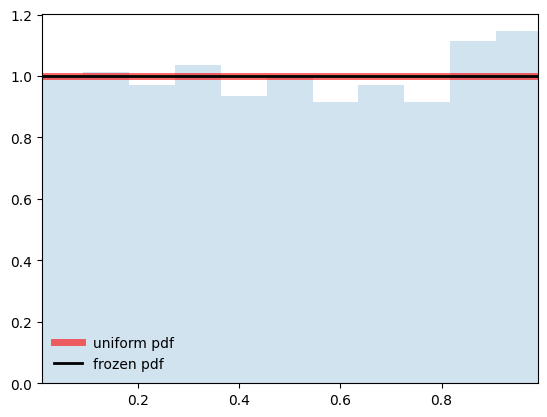

In [6]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

lb, ub = uniform.support()

mean, var, skew, kurt = uniform.stats(moments='mvsk')

x = np.linspace(uniform.ppf(0.01),
                uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x),
       'r-', lw=5, alpha=0.6, label='uniform pdf')

rv = uniform()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = uniform.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))

r = uniform.rvs(size=1000)

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

#### Exercise

1. For the Naive Bayes model, use grid search 5-fold cross-validation across different values of `alpha` to find the best model.

2. For the best value of `alpha`, compute the `f1_macro` score on the test set.
* What value of `alpha` did you obtain?
* What is the model's `f1_macro` score?

3. Repeat Exercise 1 and 2 for **random search** 5-fold cross validation across different values of `alpha`. Compute the `f1_macro` score on the test set.
* What value of `alpha` did you obtain?
* Did you get a better `f1_macro` score compared to grid search in Exercise 2?

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV

data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X_train_text, X_test_text, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# แปลงข้อความเป็นเวกเตอร์ TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# ทำ Grid Search เพื่อหา alpha ที่ดีที่สุด
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='f1_macro')

In [12]:
from sklearn.metrics import f1_score

# ค่าที่ดีที่สุดของ alpha
best_alpha_grid = grid_search.best_params_['alpha']
print("Best alpha (Grid Search):", best_alpha_grid)

# ประเมินบน test set
y_pred_grid = grid_search.best_estimator_.predict(X_test)
f1_grid = f1_score(y_test, y_pred_grid, average='macro')
print("f1_macro score (Grid Search):", f1_grid)

Best alpha (Grid Search): 0.01
f1_macro score (Grid Search): 0.7536112646524276


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# กำหนด distribution สำหรับ alpha: uniform(0.001 ถึง ~10)
param_dist = {'alpha': uniform(loc=0.001, scale=10)}

# สร้าง RandomizedSearchCV
random_search = RandomizedSearchCV(MultinomialNB(), param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='f1_macro', random_state=42)
random_search.fit(X_train, y_train)

# หาค่า alpha ที่ดีที่สุด
best_alpha_random = random_search.best_params_['alpha']
print("Best alpha (Random Search):", best_alpha_random)

# ทำนายผลและวัดค่า f1_macro
y_pred_random = random_search.best_estimator_.predict(X_test)
f1_random = f1_score(y_test, y_pred_random, average='macro')
print("f1_macro score (Random Search):", f1_random)

Best alpha (Random Search): 0.5818361216819946
f1_macro score (Random Search): 0.6616105511381798


Grid Search ให้ค่า alpha = 0.01 และได้ค่า f1_macro = 0.7536

Random Search ให้ค่า alpha = 0.5818 และได้ค่า f1_macro = 0.6616

เมื่อเปรียบเทียบแล้วพบว่า Grid Search ให้ผลดีกว่า เนื่องจากได้คะแนน f1_macro สูงกว่าบน test set